In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3037 files belonging to 3 classes.


In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 870 files belonging to 3 classes.


In [14]:
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

inputs = pretrained_model.input

# Custom Dense Layers
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.5)(x)  # Optional dropout
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Optional dropout

# Output Layer
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

# Model Definition
model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [15]:
import tensorflow as tf

# Define the Adam optimizer using the updated API
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model with the updated optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,866,883 (91.04 MB)

 Trainable params: 279,171 (1.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.4631 - loss: 1.2432 - val_accuracy: 0.8793 - val_loss: 0.4857
Epoch 2/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.7306 - loss: 0.6350 - val_accuracy: 0.9195 - val_loss: 0.2804
Epoch 3/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8312 - loss: 0.4206 - val_accuracy: 0.9437 - val_loss: 0.1966
Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8801 - loss: 0.3240 - val_accuracy: 0.9460 - val_loss: 0.1646
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.9056 - loss: 0.2684 - val_accuracy: 0.9506 - val_loss: 0.1395
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9237 - loss: 0.2316 - val_accuracy: 0.9540 - val_loss: 0.1187
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9310 - loss: 0.2005 - val_accuracy: 0.9529 - val_loss: 0.1135
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.9327 - loss: 0.1787 - val_accuracy: 0.9552 - v

In [18]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

95/95 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9892 - loss: 0.0362
Training accuracy: 0.9878169298171997


In [19]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9792 - loss: 0.0590
Validation accuracy: 0.9747126698493958


In [20]:
model.save('models/model_res1.h5')

In [21]:
model.save('models/model_res.keras')

In [22]:
history.history 

{'accuracy': [0.5531774759292603,
  0.763911783695221,
  0.8514981865882874,
  0.88936448097229,
  0.9124135375022888,
  0.9318406581878662,
  0.9338162541389465,
  0.9390846490859985,
  0.9509384036064148,
  0.9525848031044006,
  0.9558774828910828,
  0.9611458778381348,
  0.9667434692382812,
  0.9604873061180115,
  0.9743167757987976],
 'loss': [1.0126053094863892,
  0.5751844048500061,
  0.388867050409317,
  0.30183830857276917,
  0.25434809923171997,
  0.2124350666999817,
  0.18734125792980194,
  0.1777799427509308,
  0.15418721735477448,
  0.14281147718429565,
  0.1289084255695343,
  0.11206568032503128,
  0.10157716274261475,
  0.10525602847337723,
  0.08601827919483185],
 'val_accuracy': [0.8793103694915771,
  0.9195402264595032,
  0.9436781406402588,
  0.9459770321846008,
  0.9505746960639954,
  0.954023003578186,
  0.9528735876083374,
  0.9551724195480347,
  0.9609195590019226,
  0.9620689749717712,
  0.9643678069114685,
  0.9724137783050537,
  0.9678161144256592,
  0.96896553

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
history_df = pd.DataFrame(history.history)

# Save the DataFrame to an Excel file
history_df.to_excel('training_history.xlsx', index=False)

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
EPOCHS=15

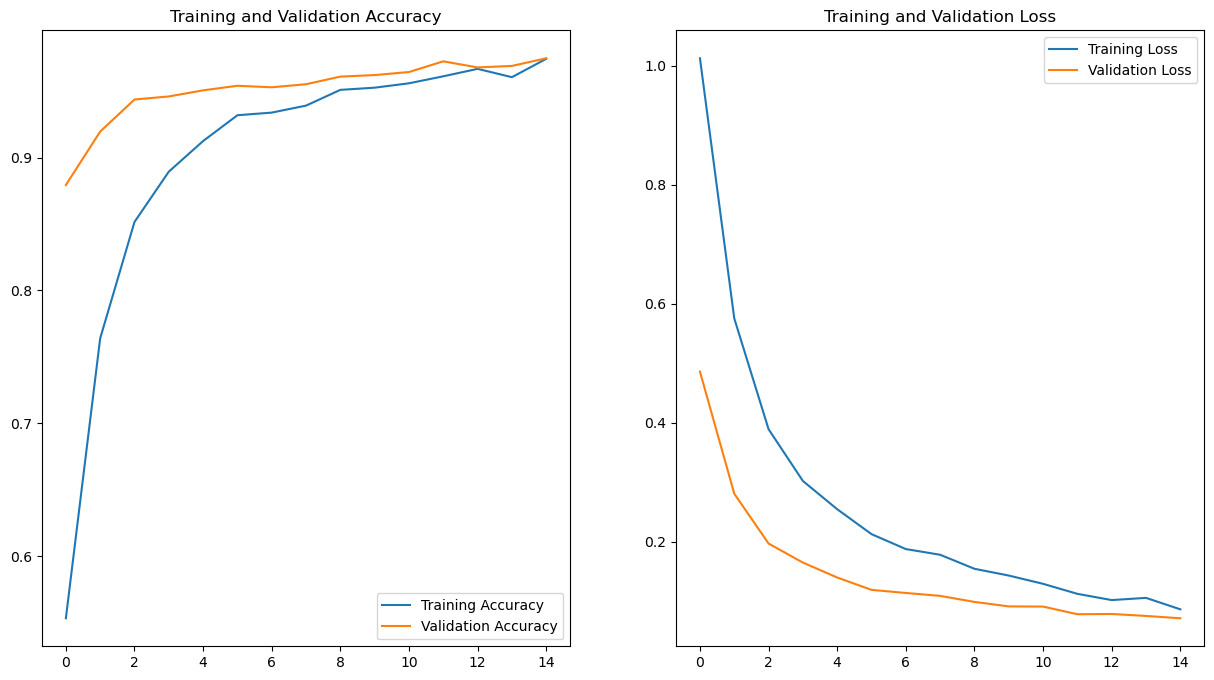

In [27]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
class_name = validation_set.class_names

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 435 files belonging to 3 classes.


In [32]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

435/435 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [34]:
Y_true

<tf.Tensor: shape=(435,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [35]:
predicted_categories

<tf.Tensor: shape=(435,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:

# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

  Black Spot       0.97      0.95      0.96       144
Downy mildew       0.98      0.99      0.99       148
  Fresh Leaf       0.97      0.97      0.97       143

    accuracy                           0.97       435
   macro avg       0.97      0.97      0.97       435
weighted avg       0.97      0.97      0.97       435



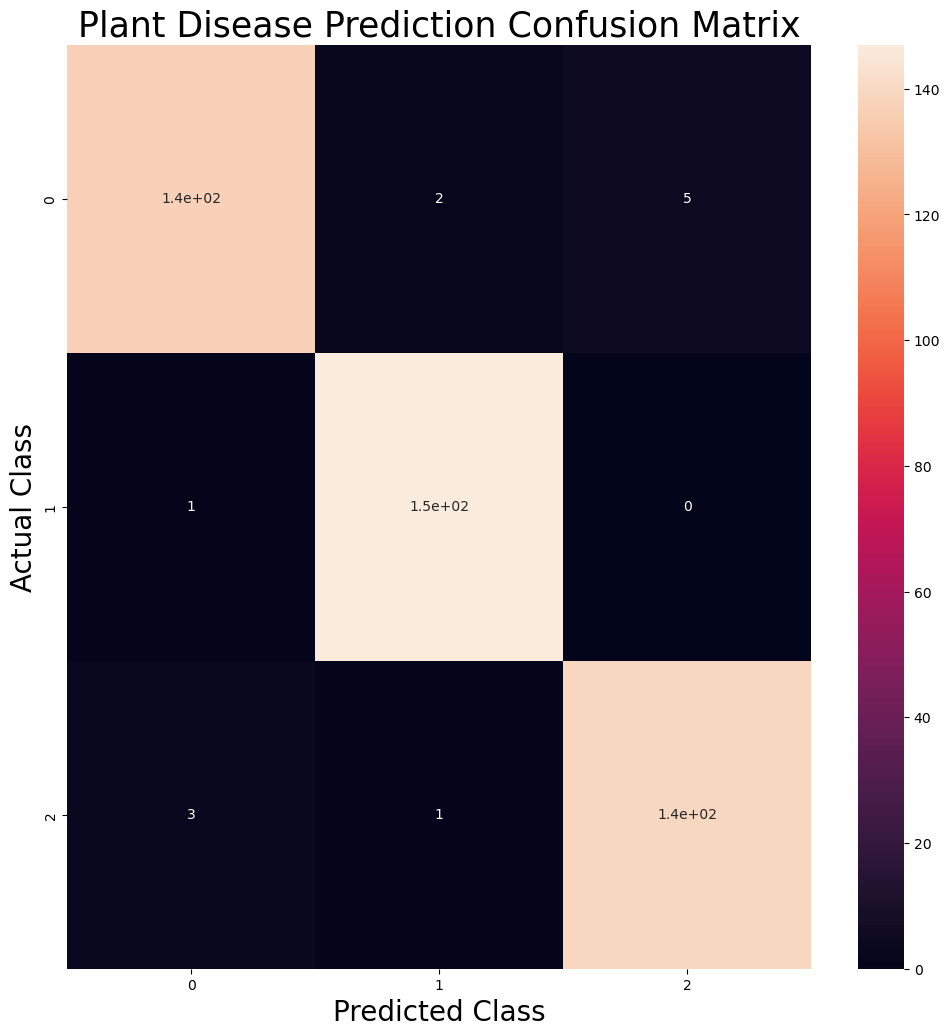

In [38]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()